    Bill    Tip Credit  Guests Day Server  PctTip
0  23.70  10.00      n       2   f      A    42.2
1  36.11   7.00      n       3   f      B    19.4
2  31.99   5.01      y       2   f      A    15.7
3  17.39   3.61      y       2   f      B    20.8
4  15.41   3.00      n       2   f      B    19.5
Index(['Bill', 'Tip', 'Credit', 'Guests', 'Day', 'Server', 'PctTip'], dtype='object')
Bootstrap mean: 3.85
95% CI (Standard Error): (3.473019521292408, 4.219372504185299)
95% CI (Percentiles): (3.4828025477707003, 4.227710191082802)


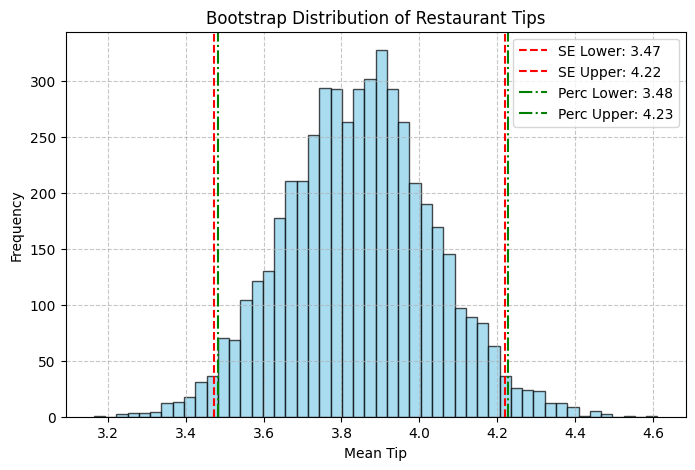

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('RestaurantTips.csv')
print(df.head())

# Check column names and choose the column for tips
print(df.columns)

# 2. Bootstrap distribution
tips = df['Tip']
np.random.seed(42)

bootstrap_means = [
    np.mean(np.random.choice(tips, size=len(tips), replace=True))
    for _ in range(5000)
]

# 3. Confidence intervals
mean_bootstrap = np.mean(bootstrap_means)
std_bootstrap = np.std(bootstrap_means)

# (a) Using Standard Error
z = 1.96
ci_se = (mean_bootstrap - z * std_bootstrap, mean_bootstrap + z * std_bootstrap)

# (b) Using Percentiles
ci_percentile = (np.percentile(bootstrap_means, 2.5), np.percentile(bootstrap_means, 97.5))

# 4. Compare results
print(f"Bootstrap mean: {mean_bootstrap:.2f}")
print(f"95% CI (Standard Error): {ci_se}")
print(f"95% CI (Percentiles): {ci_percentile}")

# 5. Plot the Bootstrap distribution
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(ci_se[0], color='red', linestyle='--', label=f'SE Lower: {ci_se[0]:.2f}')
plt.axvline(ci_se[1], color='red', linestyle='--', label=f'SE Upper: {ci_se[1]:.2f}')
plt.axvline(ci_percentile[0], color='green', linestyle='-.', label=f'Perc Lower: {ci_percentile[0]:.2f}')
plt.axvline(ci_percentile[1], color='green', linestyle='-.', label=f'Perc Upper: {ci_percentile[1]:.2f}')
plt.xlabel('Mean Tip')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Restaurant Tips')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar os dados
# Supondo que o arquivo esteja em '/mnt/data/OttawaSenators.csv'
df = pd.read_csv('/mnt/data/OttawaSenators.csv')
print(df.head())
print("Colunas:", df.columns.tolist())

# 2. Selecionar a coluna de minutos de penalidade
# Supondo que a coluna se chame 'PenMins'
penalty_minutes = df['PenMins']

# 3. Gerar a distribuição bootstrap para o desvio padrão
np.random.seed(42)
n_boot = 1000       # número de amostras bootstrap
n = len(penalty_minutes)
bootstrap_std = []

for _ in range(n_boot):
    # Amostra com reposição do mesmo tamanho da amostra original
    sample = np.random.choice(penalty_minutes, size=n, replace=True)
    # Cálculo do desvio padrão da amostra (ddof=1 para o estimador amostral)
    boot_std = np.std(sample, ddof=1)
    bootstrap_std.append(boot_std)

# 4. Calcular o intervalo de confiança de 95% usando percentis
ci_lower = np.percentile(bootstrap_std, 2.5)
ci_upper = np.percentile(bootstrap_std, 97.5)

# 5. Calcular o desvio padrão da amostra original
original_std = np.std(penalty_minutes, ddof=1)

print(f"Desvio padrão da amostra original: {original_std:.2f}")
print(f"IC 95% para o desvio padrão (percentis): ({ci_lower:.2f}, {ci_upper:.2f})")

# 6. Plotar a distribuição bootstrap
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_std, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'2.5%: {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'97.5%: {ci_upper:.2f}')
plt.axvline(original_std, color='green', linestyle='-', label=f'SD original: {original_std:.2f}')
plt.xlabel('Desvio Padrão dos Minutos de Penalidade')
plt.ylabel('Frequência')
plt.title('Distribuição Bootstrap do Desvio Padrão de Minutos de Penalidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/OttawaSenators.csv'

In [3]:
df = pd.read_csv('SampCountries.csv')
df.head()

,Country,LandArea,Population,Density,GDP,Rural,CO2,PumpPrice,Military,Health,...,Diabetes,BirthRate,DeathRate,ElderlyPop,LifeExpectancy,FemaleLabor,Unemployment,EnergyUse,Electricity,Developed
0,Iceland,100.25,0.324,3.2,47349.0,6.1,14.1,1.99,0.36,15.76,...,3.2,13.4,6.7,12.8,83.1,82.3,6.0,17964.0,52374.0,3.0
1,Kazakhstan,2699.70,17.035,6.3,13612.0,46.6,22.7,1.01,NaN,10.90,...,5.0,22.7,8.0,6.7,70.5,75.1,5.3,4717.0,4893.0,2.0
2,Lesotho,30.36,2.074,68.3,1126.0,73.7,27.6,1.24,NaN,14.48,...,4.5,27.5,15.0,4.2,49.3,60.3,NaN,NaN,NaN,NaN
3,Uzbekistan,425.40,30.243,71.1,1878.0,63.8,21.0,1.02,NaN,9.68,...,6.4,22.5,4.8,4.3,68.2,51.0,NaN,1628.0,1626.0,1.0
4,Peru,1280.00,30.376,23.7,6662.0,22.0,20.0,1.63,7.43,14.75,...,6.5,19.7,5.3,6.4,74.8,69.3,3.6,695.0,1248.0,1.0


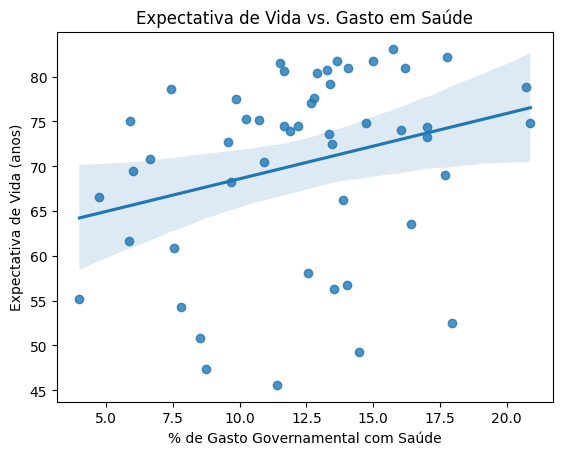

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'Health' seja a variável que indica o % de gasto em saúde
# e 'LifeExpectancy' seja a expectativa de vida.
sns.regplot(x='Health', y='LifeExpectancy', data=df)
plt.xlabel('% de Gasto Governamental com Saúde')
plt.ylabel('Expectativa de Vida (anos)')
plt.title('Expectativa de Vida vs. Gasto em Saúde')
plt.show()


In [5]:
import statsmodels.api as sm

# Definindo as variáveis
X = df['Health']
y = df['LifeExpectancy']

# Adicionando a constante (intercepto)
X = sm.add_constant(X)

# Ajustando o modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.013
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0508
Time:                        23:42:55   Log-Likelihood:                -185.82
No. Observations:                  50   AIC:                             375.6
Df Residuals:                      48   BIC:                             379.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.3202      4.702     13.040      0.0